# City of New York Complaint Problems

## Data Source

* City of New York complaint problems dataset is publicly available from the website data.gov via the link:

https://catalog.data.gov/dataset/complaint-problems-7052e

* Data published by: data.cityofnewyork.us
* Data last updated: 6 September 2019

## Data Dictionary

#### There were 18 variables within the data set with 1045040 rows 

* ProblemID
* ComplaintID
* UnitTypeID
* UnitType
* SpaceTypeID 
* SpaceType
* TypeID
* Type
* MajorCategoryID
* MajorCategory
* MinorCategoryID
* MinorCategory
* CodeID
* Code
* StatusID
* Status
* StatusDate
* StatusDescription

### Tasks:

#### 1. Insights from the dataset 
* Exploratory Data Analysis

#### 2. Build a machine learning model that performs MultiClass classification to predict the outcome of complaint type
* Type: 1=EMERGENCY 2=HARZARDOUS 3=IMMEDIATE EMERGENCY 4=NON EMERGENCY 
* StatusDescription
* UnitType
* SpaceType
* MajorCategory
* MinorCategory
* Code
* Status
* StatusDate

#### 3. Additional (Topic Modelling)
* I will explore this this evening, I would locate a news group dataset or scrape from a news website my own data set to analyze the key themes and topics.


## Problem Statements 

* 1. Uncover the key topics from the complaint status description and,
* 2. Exploratory Data Analysis
* 3. Classify New York City complaints  types into 4 pre-defined classes. 
- The problem is supervised multiclass text classification problem, and the task is to investigate which supervised machine learning method is best suited to solve it.
- Given a new complaint comes in, we want to assign it to one of 4 categories. The classifier makes the assumption that each new complaint is assigned to one and only one category. 

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import datasets
import statsmodels.formula.api as smf
import matplotlib.cm as cm
import statsmodels.api as sm

# Show plots inside a notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/importlib/

In [2]:
## Load the data into a Pandas Dataframe from csv file
import pandas as pd
df = pd.read_csv('Complaint_Problems.csv')
#### Inspect the first 5 values of the dataset
df.head()

,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,TypeID,Type,MajorCategoryID,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription
0,17307278,8412850,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,56,DOOR/WINDOW,337,WINDOW FRAME,2836,LOOSE OR DEFECTIVE,2,CLOSE,3/31/17,The Department of Housing Preservation and Dev...
1,17317058,8417365,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,UNSANITARY CONDITION,376,PESTS,2821,MICE,2,CLOSE,3/16/17,The Department of Housing Preservation and Dev...
2,17016467,8249017,91,APARTMENT,545,ENTRANCE/FOYER,1,EMERGENCY,56,DOOR/WINDOW,333,DOOR,2665,LOCK BROKEN OR MISSING,2,CLOSE,3/3/17,The Department of Housing Preservation and Dev...
3,14548958,6967900,91,APARTMENT,541,BATHROOM,1,EMERGENCY,9,PLUMBING,63,BATHTUB/SHOWER,2538,BROKEN OR MISSING,2,CLOSE,7/29/14,The Department of Housing Preservation and De...
4,14548959,6967900,91,APARTMENT,541,BATHROOM,3,NON EMERGENCY,9,PLUMBING,63,BATHTUB/SHOWER,2540,FAUCET BROKEN/MISSING/LEAKING,2,CLOSE,8/4/14,The Department of Housing Preservation and De...


In [3]:
## Exploratory Data Analysis

#### Create a new dataframe forexploratory data analysis

df2 = df[['MajorCategory','Code','Status','StatusDate', 'Type', 'MinorCategory']]

df2.head()

,MajorCategory,Code,Status,StatusDate,Type,MinorCategory
0,DOOR/WINDOW,LOOSE OR DEFECTIVE,CLOSE,3/31/17,EMERGENCY,WINDOW FRAME
1,UNSANITARY CONDITION,MICE,CLOSE,3/16/17,NON EMERGENCY,PESTS
2,DOOR/WINDOW,LOCK BROKEN OR MISSING,CLOSE,3/3/17,EMERGENCY,DOOR
3,PLUMBING,BROKEN OR MISSING,CLOSE,7/29/14,EMERGENCY,BATHTUB/SHOWER
4,PLUMBING,FAUCET BROKEN/MISSING/LEAKING,CLOSE,8/4/14,NON EMERGENCY,BATHTUB/SHOWER


In [4]:
y = df2['Type'].values
y.shape

(1048575,)

In [5]:
## Class label encoding - Transform categorical variables for Machine Learning
#### Encode class labels

from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['EMERGENCY', 'HAZARDOUS', 'IMMEDIATE EMERGENCY', 'NON EMERGENCY'],
      dtype=object)

In [6]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2, 3])

In [7]:
np.unique(l_encoder.inverse_transform(y_enc))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['EMERGENCY', 'HAZARDOUS', 'IMMEDIATE EMERGENCY', 'NON EMERGENCY'],
      dtype=object)

In [8]:
# Use Scikit-learn estimators for classification convert labels to integers internally
# we enumerate the class labels starting at 0:

import numpy as np

MajorCategory_mapping = {label:idx for idx,label in
                enumerate(np.unique(df2['MajorCategory']))}
MajorCategory_mapping
{'DOOR/WINDOW':0,'UNSANITARY CONDITION':1,'PLUMBING':2,'FLOORING/STAIRS':3,'HEAT/HOT WATER':4,'PAINT/PLASTER':5, 'ELECTRIC':6, 'GENERAL':7, 'WATER LEAK':8,'APPLIANCE':9, 'NONCONST':10, 'OUTSIDE BUILDING':11,'SAFETY':12,'HEATING':13, 'ELEVATOR':14, 'CONSTRUCTION':15}  

Status_mapping = {label:idx for idx,label in
                enumerate(np.unique(df2['Status']))}
Status_mapping
{'CLOSE':0,'OPEN':1}

Type_mapping = {label:idx for idx,label in
                enumerate(np.unique(df2['Type']))}
Type_mapping
{'EMERGENCY':0,'NON EMERGENCY':1, 'IMMEDIATE EMERGENCY':2, 'HARZARDOUS':3}

{'EMERGENCY': 0, 'NON EMERGENCY': 1, 'IMMEDIATE EMERGENCY': 2, 'HARZARDOUS': 3}

In [9]:
## Summarize the dataframe

df2.describe()

,MajorCategory,Code,Status,StatusDate,Type,MinorCategory
count,1048575,1002165,1048575,1048563,1048575,1048575
unique,16,213,2,1436,4,74
top,HEAT/HOT WATER,NO HEAT,CLOSE,1/12/15,EMERGENCY,ENTIRE BUILDING
freq,342140,204838,1046576,4855,647092,223403


In [10]:
## Data Pre-Processing

#### We are interested in examining two columns — “Type” and “StatusDescription”.
#### * Input: StatusDescription
#### * Example: “  The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.”
#### * Output: Type
#### * Example: NON EMERGENCY
#### Missing values are removed from “StatusDescription” column, and add a column encoding the product as an integer because categorical variables are often better represented by integers than strings.

#### After cleaning up, this is the first five rows of the data we will be working on:

from io import StringIO
col = ['Type', 'StatusDescription']
df = df[col]
df = df[pd.notnull(df['StatusDescription'])]

df.columns = ['Type', 'StatusDescription']

df['TypeID'] = df['Type'].factorize()[0]
TypeID_df = df[['Type', 'TypeID']].drop_duplicates().sort_values('TypeID')

Type_to_id = dict(TypeID_df.values)
id_to_Type = dict(TypeID_df[['TypeID', 'Type']].values)

df.head()

,Type,StatusDescription,TypeID
0,EMERGENCY,The Department of Housing Preservation and Dev...,0
1,NON EMERGENCY,The Department of Housing Preservation and Dev...,1
2,EMERGENCY,The Department of Housing Preservation and Dev...,0
3,EMERGENCY,The Department of Housing Preservation and De...,0
4,NON EMERGENCY,The Department of Housing Preservation and De...,1


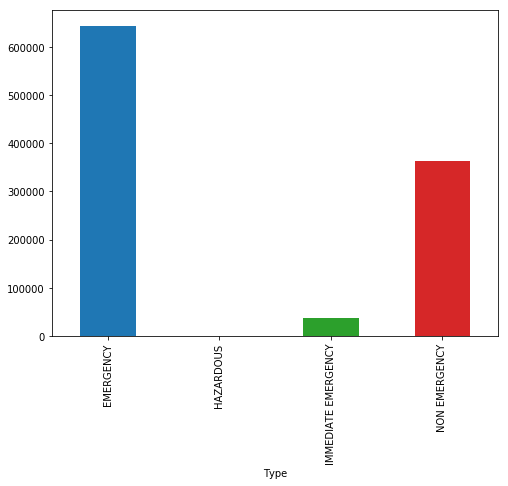

In [11]:
## Imbalanced Classes

#### We can see that complaint types are biased towards the complaint type 'EMERGENCY'

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Type').StatusDescription.count().plot.bar(ylim=0)
plt.show()

#### Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

## Text Representation

#### The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.
#### One common approach for extracting features from text is to use the bag of words model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.
#### Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:

#### * sublinear_df is set to True to use a logarithmic form for frequency.
#### * min_df is the minimum numbers of documents a word must be present in to be kept.
#### * norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
#### * ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
#### * stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.StatusDescription).toarray()
labels = df.TypeID

features.shape

#### Now, each of 1045040 complaint status description is represented by 241 features, representing the tf-idf score for different unigrams and bigrams.

(1045040, 241)

In [13]:
## Find the terms that are the most correlated with each of the products:

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Type, TypeID in sorted(Type_to_id.items()):
  features_chi2 = chi2(features, labels == TypeID)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Type))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'EMERGENCY':
  . Most correlated unigrams:
. heat
. building
  . Most correlated bigrams:
. hot water
. heat hot
# 'HAZARDOUS':
  . Most correlated unigrams:
. www
. information
  . Most correlated bigrams:
. www nyc
. issued information
# 'IMMEDIATE EMERGENCY':
  . Most correlated unigrams:
. building
. violations
  . Most correlated bigrams:
. conditions violations
. violations issued
# 'NON EMERGENCY':
  . Most correlated unigrams:
. heat
. building
  . Most correlated bigrams:
. heat hot
. hot water


In [14]:
# Multi-Class Classifier: Features and Design

#### To train supervised classifiers, we first transformed the “StatusDesscription” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.
#### After having this vector representations of the text we can train supervised classifiers to train unseen “Consumer complaint narrative” and predict the “product” on which they fall.
#### After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

## Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['StatusDescription'], df['Type'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [15]:
## After fitting the training set, let’s make some predictions to predict the status of the complaint type:

print(clf.predict(count_vect.transform([" The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd."])))


['NON EMERGENCY']


In [16]:
df[df['StatusDescription'] == " The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed."]


,Type,StatusDescription,TypeID
8,IMMEDIATE EMERGENCY,The Department of Housing Preservation and De...,2
9,NON EMERGENCY,The Department of Housing Preservation and De...,1
12,IMMEDIATE EMERGENCY,The Department of Housing Preservation and De...,2
13,EMERGENCY,The Department of Housing Preservation and De...,0
15,EMERGENCY,The Department of Housing Preservation and De...,0
18,NON EMERGENCY,The Department of Housing Preservation and De...,1
19,NON EMERGENCY,The Department of Housing Preservation and De...,1
20,NON EMERGENCY,The Department of Housing Preservation and De...,1
21,NON EMERGENCY,The Department of Housing Preservation and De...,1
23,NON EMERGENCY,The Department of Housing Preservation and De...,1


In [17]:
print(clf.predict(count_vect.transform(["More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."])))

['EMERGENCY']


In [18]:
df[df['StatusDescription'] == "The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the building that heat and hot water had been restored. If the condition still exists, please file a new complaint."]


,Type,StatusDescription,TypeID
11,EMERGENCY,The Department of Housing Preservation and Dev...,0
62,EMERGENCY,The Department of Housing Preservation and Dev...,0
69,EMERGENCY,The Department of Housing Preservation and Dev...,0
86,EMERGENCY,The Department of Housing Preservation and Dev...,0
186,EMERGENCY,The Department of Housing Preservation and Dev...,0
246,EMERGENCY,The Department of Housing Preservation and Dev...,0
257,EMERGENCY,The Department of Housing Preservation and Dev...,0
300,EMERGENCY,The Department of Housing Preservation and Dev...,0
301,EMERGENCY,The Department of Housing Preservation and Dev...,0
362,EMERGENCY,The Department of Housing Preservation and Dev...,0


# Model Selection

### We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.
### We will benchmark the following four models:

#### 1. Logistic Regression
#### 2. (Multinomial) Naive Bayes
#### 3. Linear Support Vector Machine
#### 4. Random Forest

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of membe

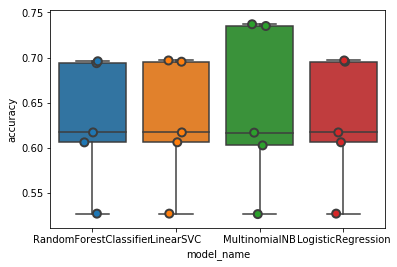

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.628669
LogisticRegression        0.628669
MultinomialNB             0.643729
RandomForestClassifier    0.628143
Name: accuracy, dtype: float64

## Model

#### MultinomialNB and LinearSVC  perform better than the other two classifiers, with MultinomialNB having a slight advantage with a median accuracy of around 64%.

# Model Evaluation

#### Continue with our best model (MultinomialNB), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

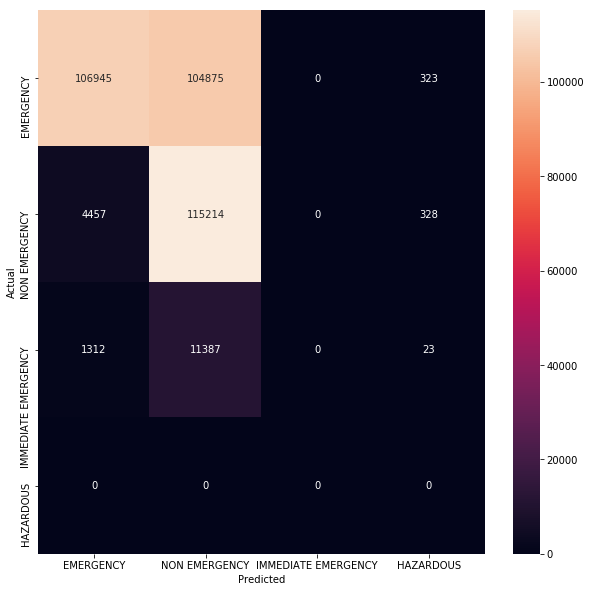

In [22]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=TypeID_df.Type.values, yticklabels=TypeID_df.Type.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
#### The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by:

from IPython.display import display
for predicted in TypeID_df.TypeID:
  for actual in TypeID_df.TypeID:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_Type[actual], id_to_Type[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Type', 'StatusDescription']])
      print('')

'NON EMERGENCY' predicted as 'EMERGENCY' : 4457 examples.


,Type,StatusDescription
659647,NON EMERGENCY,The Department of Housing Preservation and Dev...
651962,NON EMERGENCY,The Department of Housing Preservation and Dev...
1004022,NON EMERGENCY,The Department of Housing Preservation and Dev...
595133,NON EMERGENCY,The Department of Housing Preservation and Dev...
703249,NON EMERGENCY,The Department of Housing Preservation and Dev...
809096,NON EMERGENCY,The Department of Housing Preservation and Dev...
749270,NON EMERGENCY,The Department of Housing Preservation and Dev...
71704,NON EMERGENCY,The Department of Housing Preservation and Dev...
609617,NON EMERGENCY,The Department of Housing Preservation and Dev...
84761,NON EMERGENCY,The Department of Housing Preservation and Dev...



'IMMEDIATE EMERGENCY' predicted as 'EMERGENCY' : 1312 examples.


,Type,StatusDescription
437006,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
173097,IMMEDIATE EMERGENCY,More than one complaint was received for this ...
806212,IMMEDIATE EMERGENCY,More than one complaint was received for this ...
396207,IMMEDIATE EMERGENCY,More than one complaint was received for this ...
621576,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
120729,IMMEDIATE EMERGENCY,More than one complaint was received for this ...
729949,IMMEDIATE EMERGENCY,More than one complaint was received for this ...
91780,IMMEDIATE EMERGENCY,More than one complaint was received for this ...
310578,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
437418,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...



'EMERGENCY' predicted as 'NON EMERGENCY' : 104875 examples.


,Type,StatusDescription
808352,EMERGENCY,The Department of Housing Preservation and Dev...
685543,EMERGENCY,The Department of Housing Preservation and Dev...
635034,EMERGENCY,The Department of Housing Preservation and Dev...
503754,EMERGENCY,The Department of Housing Preservation and Dev...
313871,EMERGENCY,The Department of Housing Preservation and Dev...
1033945,EMERGENCY,The Department of Housing Preservation and Dev...
114671,EMERGENCY,The Department of Housing Preservation and Dev...
999892,EMERGENCY,The Department of Housing Preservation and Dev...
704768,EMERGENCY,The Department of Housing Preservation and Dev...
697408,EMERGENCY,The Department of Housing Preservation and Dev...



'IMMEDIATE EMERGENCY' predicted as 'NON EMERGENCY' : 11387 examples.


,Type,StatusDescription
612514,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
964152,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
730074,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
765010,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
841351,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
431192,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
142359,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
893944,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
128840,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
159012,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...



'EMERGENCY' predicted as 'HAZARDOUS' : 323 examples.


,Type,StatusDescription
1016607,EMERGENCY,The following complaint conditions are still o...
478312,EMERGENCY,The following complaint conditions are still o...
693471,EMERGENCY,More than one complaint was received for this ...
947374,EMERGENCY,The following complaint conditions are still o...
882352,EMERGENCY,The following complaint conditions are still o...
1034467,EMERGENCY,The following complaint conditions are still o...
959738,EMERGENCY,The following complaint conditions are still o...
838064,EMERGENCY,The following complaint conditions are still o...
924851,EMERGENCY,The following complaint conditions are still o...
1025945,EMERGENCY,The following complaint conditions are still o...



'NON EMERGENCY' predicted as 'HAZARDOUS' : 328 examples.


,Type,StatusDescription
747238,NON EMERGENCY,The following complaint conditions are still o...
1045423,NON EMERGENCY,The following complaint conditions are still o...
1041771,NON EMERGENCY,The following complaint conditions are still o...
953192,NON EMERGENCY,The following complaint conditions are still o...
974623,NON EMERGENCY,The following complaint conditions are still o...
1036338,NON EMERGENCY,The following complaint conditions are still o...
789573,NON EMERGENCY,The following complaint conditions are still o...
972197,NON EMERGENCY,The following complaint conditions are still o...
971015,NON EMERGENCY,The following complaint conditions are still o...
207737,NON EMERGENCY,The following complaint conditions are still o...



'IMMEDIATE EMERGENCY' predicted as 'HAZARDOUS' : 23 examples.


,Type,StatusDescription
101672,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
718349,IMMEDIATE EMERGENCY,More than one complaint was received for this ...
338608,IMMEDIATE EMERGENCY,The following complaint conditions are still o...
63796,IMMEDIATE EMERGENCY,The following complaint conditions are still o...
151316,IMMEDIATE EMERGENCY,The following complaint conditions are still o...
880328,IMMEDIATE EMERGENCY,The following complaint conditions are still o...
299455,IMMEDIATE EMERGENCY,The following complaint conditions are still o...
862839,IMMEDIATE EMERGENCY,The Department of Housing Preservation and Dev...
39834,IMMEDIATE EMERGENCY,The following complaint conditions are still ...
102617,IMMEDIATE EMERGENCY,The following complaint conditions are still o...


In [25]:
#### Misclassified complaint status are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report). This sort of errors will always happen.
#### Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:
    
model.fit(features, labels)
N = 2
for Type, TypeID in sorted(Type_to_id.items()):
  indices = np.argsort(model.coef_[TypeID])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Type))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))    

# 'EMERGENCY':
  . Top unigrams:
       . complaint
       . violations
  . Top bigrams:
       . complaint closed
       . department housing
# 'HAZARDOUS':
  . Top unigrams:
       . violations
       . www
  . Top bigrams:
       . issued information
       . www nyc
# 'IMMEDIATE EMERGENCY':
  . Top unigrams:
       . violations
       . inspected
  . Top bigrams:
       . violations issued
       . conditions violations
# 'NON EMERGENCY':
  . Top unigrams:
       . violations
       . inspected
  . Top bigrams:
       . conditions violations
       . development inspected


In [26]:
## They are consistent within our expectation.
#### We print out the classification report for each class:

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Type'].unique()))

                     precision    recall  f1-score   support

          EMERGENCY       0.95      0.50      0.66    212143
      NON EMERGENCY       0.50      0.96      0.66    119999
IMMEDIATE EMERGENCY       0.00      0.00      0.00     12722
          HAZARDOUS       0.00      0.00      0.00         0

        avg / total       0.76      0.64      0.63    344864



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
# Data Visualisation

#### Display the plots in the notebook with the following command
%matplotlib inline

#### Import the graphing libraries we will use
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [29]:
import seaborn as sns
sns.set(color_codes=True)

Text(0,0.5,'Type')

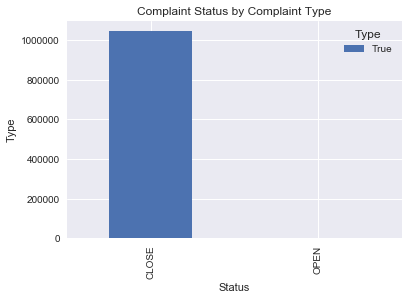

In [43]:
# Barplot of Status grouped by Type 
pd.crosstab(df2.Status, df2.Type.astype(bool)).plot(kind='bar')
plt.title('Complaint Status by Complaint Type')
plt.xlabel('Status')
plt.ylabel('Type')

# status -> True = Open, False = Closed

Text(0,0.5,'Type')

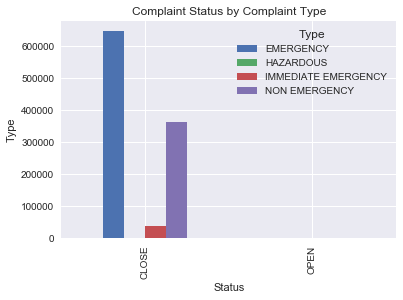

In [44]:
# Barplot of Status grouped by Type 
pd.crosstab(df2.Status, df2.Type).plot(kind='bar')
plt.title('Complaint Status by Complaint Type')
plt.xlabel('Status')
plt.ylabel('Type')


Text(0,0.5,'Type')

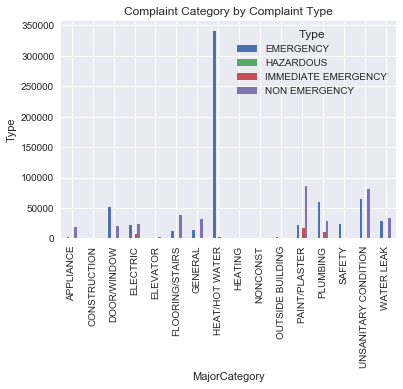

In [38]:
# Barplot of MajorCategory grouped by Type 
pd.crosstab(df2.MajorCategory, df2.Type).plot(kind='bar')
plt.title('Complaint Category by Complaint Type')
plt.xlabel('MajorCategory')
plt.ylabel('Type')

In [ ]:
# Grouped histogram of complaint status grouped by complaint status type (shows distribution for each group)

#df2.Status.hist(by=df2.Type, sharex=True,sharey=True)
#plt.xlabel('Type')
#plt.ylabel('Status')


# Primary Consideration of Scalability of a solution for News Corp:

##### The New York Complaint Problem dataset can be scaled as a use case for News Corp using multiclass classification to improve
#### customer service from call centre teams who receive satisfaction surveys which identify feedback(free form text) for complaints and compliments
#### Specifically, customer feedback may be captured from the website https://www.newscorpaustralia.com/contact-us/ predictive models such as multiclass classification and topic modelling can be used to assist the following classes (i.e.teams):
 
 #### * Advertising - Digital/Print/Search/Social
 #### * Advertising - Real Estate  
 #### * Advertising - Classifieds(Trades, Employment etc.)
 #### * Editorial enquiry
 #### * Subscription enquiry   
    

# Other Considerations of Scalability of potential solutions at News Corp

## Natural Language Processing :

#### Text mining is very useful for conducting sentiment analysis(positive vs negative) from Twitter feeds for understanding the digital audience engagement from news articles, marketing campaign with Coles kids toy partnership.

#### 1. Descriptive models - can be useful to find out:
* Who are our readers? Use third party data e.g Australian Bureau of Statistics
* What are they reading? Use Topic models
* Which blog posts and news articles are they reading?
* Where do our readers live? Use geo-spatial data e.g. Corelogic data and Google API

- Topic modelling: By understanding who our readers are and what topics or articles are being indexed on websites, we can uncover word associations.
- Hence we can understand people by the journalistic questions: Who? What? Where? When?    

#### 2. Predictive models - can be useful to find out:
* May build a newspaper delivery subscription model to predict which customer will become a subscriber and which subscriber will cancel their subscription.
* May analyze customer feedback surveys to analyze customer demographics at risk of cancelling their subscription
- Engage a focus group to analyze how people feel when they read an article, manage a survey quota and then monetize by placing premium ads that produce an emotion (a call to action) next to the article to increase customer readership both digital and print.
- Predict risky behaviour of churn (e.g change marketing mix to increase promotions or provide incentives for a customer segment)
- Who will cancel their subcription?

#### 3. Prescription models - can be useful to find out:
* Use deep learning models such as convolutional neural network(CNN) to help an editor enhance the quality of a darker or grey photo (poor quality) that is filed from a journalist to be published with the news or feature article.
* Conduct A/B testing a website (control and treatment groups) to build mobile app with UX designers, front-end and back-end devops to design a search engine or web app using Flask to access digital content or search for most read articles within last 3, 6 and 9 months

In [ ]:
## References:
* https://scikit-learn.org/stable/modules/multiclass.html
* https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
* https://towardsdatascience.com/beginners-guide-to-lda-topic-modelling-with-r-e57a5a8e7a25
* https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f

In [ ]:
## 3. Additional Task: I am working on Topic Modelling and will provide details by Friday morning 9am.

In [ ]:
# The end